#  data  

In [229]:
#import the packages  
from statsmodels.formula.api import ols 
import statsmodels.api as sm
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime


In [230]:
#read the Flights_raw data
table = pd.read_excel(r'C:\Users\amin\Downloads\Flights_raw.xlsx')


In [231]:

for i in range(len(table['date'])):
    table['date'].iloc[i]=datetime.strptime(table['date'].iloc[i], '%Y-%m-%d')


C:\Users\amin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [232]:
l=table['total_cases']
n=table['Group']
# create a new data frame for aggregation 
TABLE = pd.DataFrame({'covid_19':l},index=pd.date_range('2019-06-13', periods=433))
for i in range(433):
    TABLE['covid_19'].iloc[i]=l[i]
    


In [233]:
c=0
for i in range(len(TABLE['covid_19'])):
    if TABLE['covid_19'].iloc[i]!=0:
        c+=1
#aggregation by summing up cases within each month
TABLE_agregated = TABLE.groupby(pd.Grouper(freq='M')).sum()
TABLE_agregated = TABLE_agregated.head(12)
x,y = TABLE_agregated.shape
      

In [234]:
#read the Flights_raw data
data = pd.read_excel(r'C:\Users\amin\Downloads\electricity.xlsx')
data = data.T
data['Electricity supplied']=data[0]
data['Combustible Fuels']=data.index

data=data.drop(columns=[0])
data=data.drop(['Combustible Fuels'])
data =data.tail(x)


In [235]:
for i in range(len(data['Electricity supplied'])):
    data['Electricity supplied'].iloc[i]=data['Electricity supplied'].iloc[i].replace(' ','')
    data['Combustible Fuels'].iloc[i]=data['Combustible Fuels'].iloc[i].replace(' ','')
  

In [236]:
TABLE_agregated['Electricity supplied']=data['Electricity supplied']
TABLE_agregated['Combustible Fuels']=data['Combustible Fuels']
for i in range(len(TABLE_agregated['Electricity supplied'])):
    TABLE_agregated['Electricity supplied'].iloc[i]=float(data['Electricity supplied'].iloc[i])
    TABLE_agregated['Combustible Fuels'].iloc[i]=float(data['Combustible Fuels'].iloc[i])
    

#  Data Analysis

In [270]:
data_standarized = StandardScaler().fit_transform(TABLE_agregated .values)

In [238]:
first_parametr = data_standarized.T[0] #covid_19
second_parametr =data_standarized.T[1]#Electricity supplied
third_parametr =data_standarized.T[2]#Combustible Fuels
    

In [239]:
#OLS regression total cases and Electricity supplied
model = sm.OLS(second_parametr, first_parametr)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.436
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                              8.495
Date:                Fri, 28 Aug 2020   Prob (F-statistic):                      0.0141
Time:                        01:56:45   Log-Likelihood:                         -13.594
No. Observations:                  12   AIC:                                      29.19
Df Residuals:                      11   BIC:                                      29.67
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\amin\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [240]:
#OLS regression total cases and Combustible Fuels
model1 = sm.OLS(third_parametr, first_parametr)
results1 = model1.fit()
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.339
Model:                            OLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              5.640
Date:                Fri, 28 Aug 2020   Prob (F-statistic):                      0.0368
Time:                        01:56:46   Log-Likelihood:                         -14.544
No. Observations:                  12   AIC:                                      31.09
Df Residuals:                      11   BIC:                                      31.57
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Visualisation

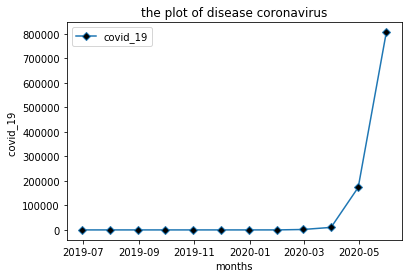

In [261]:
#plot the linechart using the non-standarisation data for Covid_19
plt.plot(TABLE_agregated.index,TABLE_agregated['covid_19'],marker='D', markerfacecolor='k',label="covid_19")

plt.title('the plot of disease coronavirus')
plt.xlabel('months')
plt.ylabel('covid_19 ')
plt.legend()

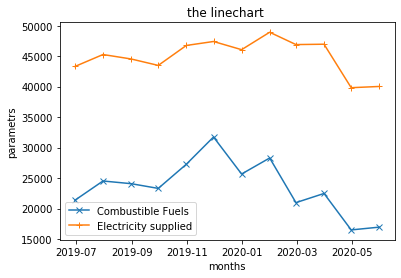

In [255]:
#the line chart using the non-standarisation data for other parametrs
plt.plot(TABLE_agregated.index,TABLE_agregated['Combustible Fuels'],marker='x',label="Combustible Fuels")
plt.plot(TABLE_agregated.index,TABLE_agregated['Electricity supplied'],marker='+',label="Electricity supplied")
plt.title('the linechart ')
plt.xlabel('months')
plt.ylabel('parametrs')
plt.legend()

probability density function for each variable using the standarised values

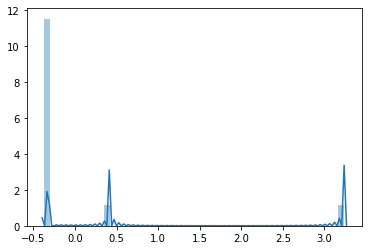

In [245]:
# Covid_19 
sns.distplot(X);

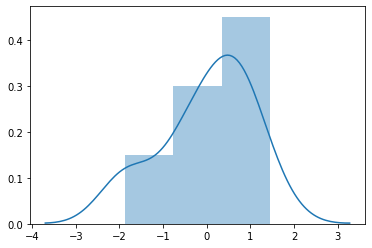

In [246]:
#Electricity supplied
sns.distplot(Y1);

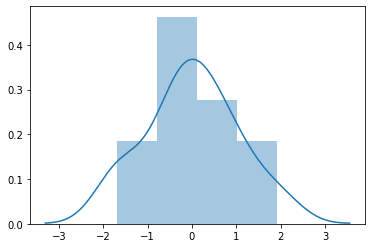

In [247]:
#Combustible Fuels
sns.distplot(Y2);

probability density function for each variable using the normal values

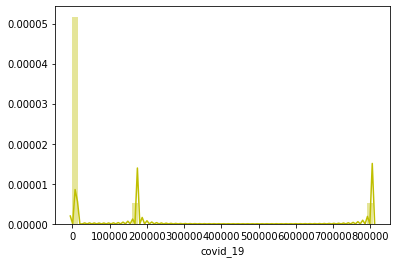

In [267]:
#Covid_19 
sns.distplot(TABLE_agregated['covid_19'],color='y');

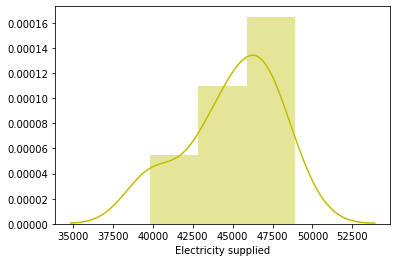

In [268]:
#Electricity supplied
sns.distplot(TABLE_agregated['Electricity supplied'],color='y');

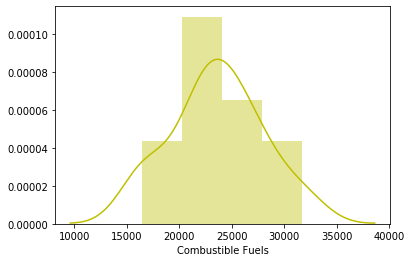

In [269]:
#Combustible Fuels
sns.distplot(TABLE_agregated['Combustible Fuels'],color='y');